# <center> <span style="color:indigo">        Escuela de ML y DL Módulo 1</span> </center> 
##  <center> <span style="color:DarkBlue">       Tarea 3: k-vecinos más cercanos (k - Nearest Neighbors) </span>  </center>
##  <center> <span style="color:DarkBlue"> Karla Guadalupe Ornelas Gamero</span>  </center>
##  <center> <span style="color:DarkBlue">karla.gameroo@gmail.com</span>  </center>
##  <center> <span style="color:DarkBlue"> Abril 2024</span>  </center>

##  Contenido
1. <span style="color:DarkBlue">Planteamiento del problema (qué hacer)</span>
2. <span style="color:DarkBlue">Planteamiento de la solución (cómo se hizó)</span>
3. <span style="color:DarkBlue">Ejemplo de ejecución (código)</span>
4. <span style="color:DarkBlue">Conclusiones </span>
5. <span style="color:DarkBlue">Referencias</span>


## <span style="color:DarkBlue"> 1. Planteamiento del problema</span>
Haciendo uso del notebook presentado en la Sesión kNN (P3-KNN.ipynb) y del conjunto de datos de pozos profundos en Michoacán, crea y entrena un modelo de k-NN con una k óptima. Emplea el método GridSearchCV para encontrar dicha k. Por último, compara los resultados con los obtenidos en la sesión del Módulo I, presentando las gráficas que consideres apropiadas para mostrar los resultados de cada método.

## <span style="color:DarkciónBlue"> 2. Planteamiento de la solución</span>
Aplicar la funcion GridSearchCV() para poder encontrar dicha k, analizar los resultados. 

El código es:



# k - Nearest Neighbors

In [197]:
%matplotlib inline

import os
import zipfile
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay, accuracy_score,
                             precision_score, recall_score, f1_score, classification_report)

In [198]:
PATH = "./Datasets/"

### Instalar las siguientes librerías para leer el archivo en formato ```.xlsx```

- ```conda install xlrd```
- ```conda install openpyxl```

---

# Contenido
## &nbsp;&nbsp;1. Preparar los datos.
## &nbsp;&nbsp;2. Análisis Exploratorio de Datos (EDA).
## &nbsp;&nbsp;3. Dividir los datos en la matriz $X$ y el vector de etiquetas $y$.
## &nbsp;&nbsp;4. Codificar los datos categóricos y escalar los que son numéricos.
## &nbsp;&nbsp;5. Construir el modelo.
## &nbsp;&nbsp;6. Análisis del desempeño del modelo.
## &nbsp;&nbsp;7. Encontrar el valor _óptimo_ de $k$.

---

## 1. Preparar los datos.

In [199]:
pozos = pd.read_excel(PATH + 'Pozos_Michoacan.xlsx')

In [200]:
pozos.head()

,#,Título,Latitud,Longitud,Estado,Municipio,RegiónHidrológica,Cuenca,AcuíferoHomologado,Volumen (m3/año),Uso
0,1,837156,"19°58'36.0006""","-101°16'41.0007""",MICHOACÁN DE OCAMPO,HUANDACAREO,LERMA-SANTIAGO,188,1602 - MORELIA-QUERENDARO,"22,800.00",AGRICOLA
1,2,836988,"19°59'22.0004""","-101°16'30.0003""",MICHOACÁN DE OCAMPO,HUANDACAREO,LERMA-SANTIAGO,188,1602 - MORELIA-QUERENDARO,"9,000.00",AGRICOLA
2,3,836992,"20°02'22.0006""","-101°09'00.0005""",MICHOACÁN DE OCAMPO,CUITZEO,LERMA-SANTIAGO,188,1602 - MORELIA-QUERENDARO,"20,020.00",AGRICOLA
3,4,836822,"20°01'50.0005""","-101°09'38.0006""",MICHOACÁN DE OCAMPO,CUITZEO,LERMA-SANTIAGO,188,1602 - MORELIA-QUERENDARO,"6,000.00",AGRICOLA
4,5,835739,"19°49'11.0005""","-101°08'37.0006""",MICHOACÁN DE OCAMPO,TARÍMBARO,LERMA-SANTIAGO,188,1602 - MORELIA-QUERENDARO,"30,000.00",SERVICIOS


In [201]:
pozos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1363 entries, 0 to 1362
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   #                   1363 non-null   int64  
 1   Título              1363 non-null   object 
 2   Latitud             1363 non-null   object 
 3   Longitud            1363 non-null   object 
 4   Estado              1363 non-null   object 
 5   Municipio           1363 non-null   object 
 6   RegiónHidrológica   1363 non-null   object 
 7   Cuenca              1363 non-null   int64  
 8   AcuíferoHomologado  1363 non-null   object 
 9   Volumen (m3/año)    1363 non-null   float64
 10  Uso                 1363 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 117.3+ KB


> Como no existen registros vacíos, se procede a trabajar con los datos.

### Modificar el tipo de las columnas ```object```

In [202]:
cols = ['Título', 'Latitud', 'Longitud', 'Estado', 'Municipio', 'RegiónHidrológica', 'AcuíferoHomologado', 'Uso']
pozos[cols] = pozos[cols].astype('string')

pozos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1363 entries, 0 to 1362
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   #                   1363 non-null   int64  
 1   Título              1363 non-null   string 
 2   Latitud             1363 non-null   string 
 3   Longitud            1363 non-null   string 
 4   Estado              1363 non-null   string 
 5   Municipio           1363 non-null   string 
 6   RegiónHidrológica   1363 non-null   string 
 7   Cuenca              1363 non-null   int64  
 8   AcuíferoHomologado  1363 non-null   string 
 9   Volumen (m3/año)    1363 non-null   float64
 10  Uso                 1363 non-null   string 
dtypes: float64(1), int64(2), string(8)
memory usage: 117.3 KB


In [203]:
pozos.describe()

,#,Cuenca,Volumen (m3/año)
count,"1,363.00","1,363.00","1,363.00"
mean,682.00,28.55,"155,836.62"
std,393.61,67.49,"388,446.52"
min,1.00,0.00,0.00
25%,341.50,0.00,"15,000.00"
50%,682.00,0.00,"46,680.00"
75%,"1,022.50",0.00,"162,180.00"
max,"1,363.00",188.00,"11,037,600.00"


In [204]:


# Correct value counts code
print(pozos['Título'].value_counts())

Título
08MCH100302/12HSDL07    41
08MCH100312/12FVGC16    40
04MCH100310/18FVGC16    30
MCH123712                4
08MCH105205/12FMDL17     3
                        ..
4MCH103399/12HMGE95      1
4MCH104989/12AMGE96      1
4MCH105007/12HMGE96      1
MCH104683                1
MCH109820                1
Name: count, Length: 1205, dtype: Int64


---

# 2. EDA.

In [205]:
pozos['Uso'].unique()

<StringArray>
[       'AGRICOLA',       'SERVICIOS',      'INDUSTRIAL',  'PUBLICO URBANO',
 'DIFERENTES USOS',        'PECUARIO',       'DOMESTICO',     'ACUACULTURA',
   'AGROINDUSTIAL']
Length: 9, dtype: string

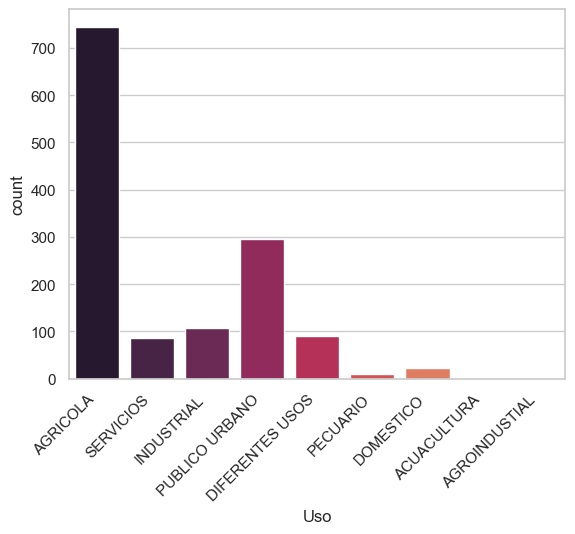

In [206]:
sns.countplot(data=pozos, x='Uso', palette='rocket')
plt.xticks(rotation=45, ha='right')
plt.show()

In [207]:
pozos['Uso'].value_counts()  # no unir diferentes usos

Uso
AGRICOLA           745
PUBLICO URBANO     296
INDUSTRIAL         107
DIFERENTES USOS     91
SERVICIOS           87
DOMESTICO           23
PECUARIO            11
ACUACULTURA          2
AGROINDUSTIAL        1
Name: count, dtype: Int64

In [208]:
pozos.shape

(1363, 11)

### Corregir el único registro con el uso ```AGROINDUSTIAL``` (falta la segunda letra 'R')

In [209]:
pozos['Uso'].replace('AGROINDUSTIAL', 'AGROINDUSTRIAL', inplace=True)

pozos[pozos['Uso'] == 'AGROINDUSTIAL'].head()  # probar también con 'AGROINDUSTRIAL'

,#,Título,Latitud,Longitud,Estado,Municipio,RegiónHidrológica,Cuenca,AcuíferoHomologado,Volumen (m3/año),Uso


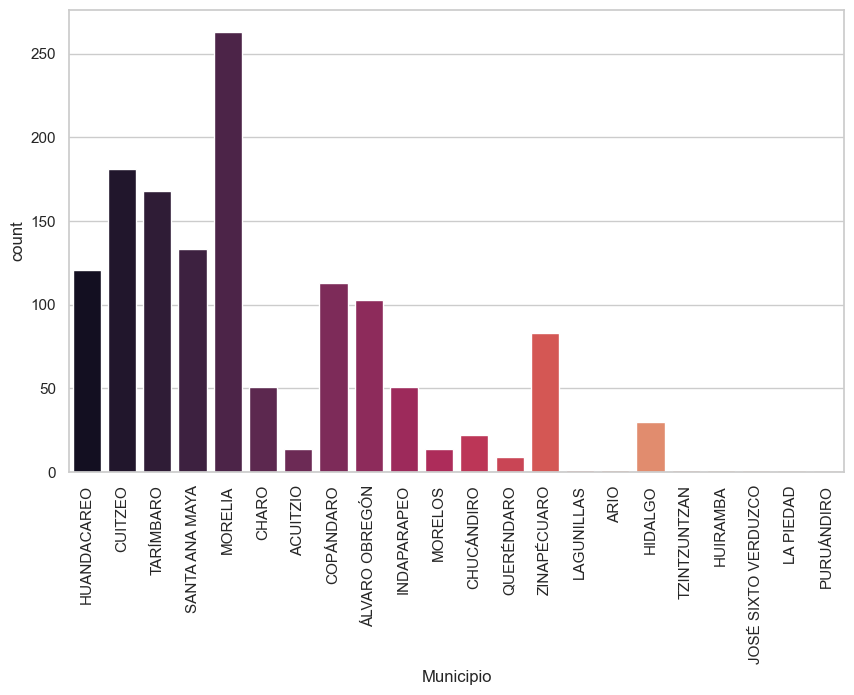

In [210]:
plt.figure(figsize=(10, 6))
sns.countplot(data=pozos, x='Municipio', palette='rocket')
plt.xticks(rotation=90)
plt.show()

In [211]:
pozos['Municipio'].value_counts()

Municipio
MORELIA                263
CUITZEO                181
TARÍMBARO              168
SANTA ANA MAYA         133
HUANDACAREO            121
COPÁNDARO              113
ÁLVARO OBREGÓN         103
ZINAPÉCUARO             83
CHARO                   51
INDAPARAPEO             51
HIDALGO                 30
CHUCÁNDIRO              22
MORELOS                 14
ACUITZIO                14
QUERÉNDARO               9
LAGUNILLAS               1
ARIO                     1
TZINTZUNTZAN             1
HUIRAMBA                 1
JOSÉ SIXTO VERDUZCO      1
LA PIEDAD                1
PURUÁNDIRO               1
Name: count, dtype: Int64

In [212]:
pozos["RegiónHidrológica"].value_counts()

RegiónHidrológica
LERMA-SANTIAGO    1339
BALSAS              24
Name: count, dtype: Int64

In [213]:
pozos[pozos['Uso'] == 'ACUACULTURA']

,#,Título,Latitud,Longitud,Estado,Municipio,RegiónHidrológica,Cuenca,AcuíferoHomologado,Volumen (m3/año),Uso
280,281,08MCH124448/12DMDL12,"19°54'25.0000""","-100°50'20.0000""",MICHOACÁN DE OCAMPO,ZINAPÉCUARO,LERMA-SANTIAGO,0,1602 - MORELIA-QUERENDARO,"30,000.00",ACUACULTURA
1302,1303,4MCH104139/12DMGE95,"19°54'23.0000""","-101°09'17.0000""",MICHOACÁN DE OCAMPO,CUITZEO,LERMA-SANTIAGO,0,1602 - MORELIA-QUERENDARO,"15,000.00",ACUACULTURA


In [214]:
pozos[pozos['Uso'] == 'AGROINDUSTRIAL']

,#,Título,Latitud,Longitud,Estado,Municipio,RegiónHidrológica,Cuenca,AcuíferoHomologado,Volumen (m3/año),Uso
941,942,08MCH102230/12BMDL08,"20°04'15.0000""","-101°07'14.0000""",MICHOACÁN DE OCAMPO,SANTA ANA MAYA,LERMA-SANTIAGO,0,1602 - MORELIA-QUERENDARO,"40,000.00",AGROINDUSTRIAL


### Eliminar duplicados en la columna ```AcuíferoHomologado```

In [215]:
pozos['AcuíferoHomologado'].value_counts()  # eliminar duplicados

AcuíferoHomologado
1602  - MORELIA-QUERENDARO      1138
1602 - MORELIA-QUERENDARO        197
1610 - CIUDAD HIDALGO-TUXPAN      28
Name: count, dtype: Int64

In [216]:
pozos['AcuíferoHomologado'].replace('1602  - MORELIA-QUERENDARO', '1602 - MORELIA-QUERENDARO', inplace = True)
pozos['AcuíferoHomologado'].value_counts()

AcuíferoHomologado
1602 - MORELIA-QUERENDARO       1335
1610 - CIUDAD HIDALGO-TUXPAN      28
Name: count, dtype: Int64

### Eliminar las columnas que no aportan información

In [217]:
pozos.drop(['#', 'Estado', "Título"], axis = 1, inplace = True)
pozos.head()

,Latitud,Longitud,Municipio,RegiónHidrológica,Cuenca,AcuíferoHomologado,Volumen (m3/año),Uso
0,"19°58'36.0006""","-101°16'41.0007""",HUANDACAREO,LERMA-SANTIAGO,188,1602 - MORELIA-QUERENDARO,"22,800.00",AGRICOLA
1,"19°59'22.0004""","-101°16'30.0003""",HUANDACAREO,LERMA-SANTIAGO,188,1602 - MORELIA-QUERENDARO,"9,000.00",AGRICOLA
2,"20°02'22.0006""","-101°09'00.0005""",CUITZEO,LERMA-SANTIAGO,188,1602 - MORELIA-QUERENDARO,"20,020.00",AGRICOLA
3,"20°01'50.0005""","-101°09'38.0006""",CUITZEO,LERMA-SANTIAGO,188,1602 - MORELIA-QUERENDARO,"6,000.00",AGRICOLA
4,"19°49'11.0005""","-101°08'37.0006""",TARÍMBARO,LERMA-SANTIAGO,188,1602 - MORELIA-QUERENDARO,"30,000.00",SERVICIOS


In [218]:
def to_seconds(coords, start_deg = 0, start_min=2, start_sec=4):
    
    coords = (coords  # eliminar identificadores de grados, minutos y segundos
              .replace('°', '')
              .replace("'", '')
              .replace('"', '')
             )
    
    result = 1
    if coords[0] == '-':  # negative coordinates
        result = -1
        start_deg += 1
        start_min += 1
        start_sec += 1

    result *= 3_600*float(coords[start_deg : start_min]) + 60*float(coords[start_min : start_sec]) + float(coords[start_sec : ])
    
    return result

In [219]:
pozos[['Latitud']].head()

,Latitud
0,"19°58'36.0006"""
1,"19°59'22.0004"""
2,"20°02'22.0006"""
3,"20°01'50.0005"""
4,"19°49'11.0005"""


In [220]:
pozos[['Latitud']] = pozos[['Latitud']].map(to_seconds)
pozos[['Latitud']].head()

,Latitud
0,"71,916.00"
1,"71,962.00"
2,"72,142.00"
3,"72,110.00"
4,"71,351.00"


In [221]:
pozos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1363 entries, 0 to 1362
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Latitud             1363 non-null   float64
 1   Longitud            1363 non-null   string 
 2   Municipio           1363 non-null   string 
 3   RegiónHidrológica   1363 non-null   string 
 4   Cuenca              1363 non-null   int64  
 5   AcuíferoHomologado  1363 non-null   string 
 6   Volumen (m3/año)    1363 non-null   float64
 7   Uso                 1363 non-null   string 
dtypes: float64(2), int64(1), string(5)
memory usage: 85.3 KB


In [222]:
pozos[['Longitud']].head()

,Longitud
0,"-101°16'41.0007"""
1,"-101°16'30.0003"""
2,"-101°09'00.0005"""
3,"-101°09'38.0006"""
4,"-101°08'37.0006"""


In [223]:
pozos[['Longitud']] = pozos[['Longitud']].map(to_seconds, start_deg = 0, start_min=3, start_sec=5)
pozos[['Longitud']].head()

,Longitud
0,"-364,601.00"
1,"-364,590.00"
2,"-364,140.00"
3,"-364,178.00"
4,"-364,117.00"


In [224]:
pozos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1363 entries, 0 to 1362
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Latitud             1363 non-null   float64
 1   Longitud            1363 non-null   float64
 2   Municipio           1363 non-null   string 
 3   RegiónHidrológica   1363 non-null   string 
 4   Cuenca              1363 non-null   int64  
 5   AcuíferoHomologado  1363 non-null   string 
 6   Volumen (m3/año)    1363 non-null   float64
 7   Uso                 1363 non-null   string 
dtypes: float64(3), int64(1), string(4)
memory usage: 85.3 KB


---

### Revisar el Dataframe final

In [225]:
pozos.head()

,Latitud,Longitud,Municipio,RegiónHidrológica,Cuenca,AcuíferoHomologado,Volumen (m3/año),Uso
0,"71,916.00","-364,601.00",HUANDACAREO,LERMA-SANTIAGO,188,1602 - MORELIA-QUERENDARO,"22,800.00",AGRICOLA
1,"71,962.00","-364,590.00",HUANDACAREO,LERMA-SANTIAGO,188,1602 - MORELIA-QUERENDARO,"9,000.00",AGRICOLA
2,"72,142.00","-364,140.00",CUITZEO,LERMA-SANTIAGO,188,1602 - MORELIA-QUERENDARO,"20,020.00",AGRICOLA
3,"72,110.00","-364,178.00",CUITZEO,LERMA-SANTIAGO,188,1602 - MORELIA-QUERENDARO,"6,000.00",AGRICOLA
4,"71,351.00","-364,117.00",TARÍMBARO,LERMA-SANTIAGO,188,1602 - MORELIA-QUERENDARO,"30,000.00",SERVICIOS


In [226]:
pozos.describe()

,Latitud,Longitud,Cuenca,Volumen (m3/año)
count,"1,363.00","1,363.00","1,363.00","1,363.00"
mean,"71,490.95","-364,096.13",28.55,"155,836.62"
std,645.40,721.15,67.49,"388,446.52"
min,"68,005.00","-371,361.00",0.00,0.00
25%,"71,118.00","-364,411.50",0.00,"15,000.00"
50%,"71,468.00","-364,145.00",0.00,"46,680.00"
75%,"71,938.25","-363,778.00",0.00,"162,180.00"
max,"79,260.00","-362,170.00",188.00,"11,037,600.00"


---

## 3. Dividir los datos en la matriz $X$ y el vector de etiquetas $y$.

In [227]:
X = pozos.iloc[ : , : -1]
y = pozos['Uso']

In [228]:
X.head()

,Latitud,Longitud,Municipio,RegiónHidrológica,Cuenca,AcuíferoHomologado,Volumen (m3/año)
0,"71,916.00","-364,601.00",HUANDACAREO,LERMA-SANTIAGO,188,1602 - MORELIA-QUERENDARO,"22,800.00"
1,"71,962.00","-364,590.00",HUANDACAREO,LERMA-SANTIAGO,188,1602 - MORELIA-QUERENDARO,"9,000.00"
2,"72,142.00","-364,140.00",CUITZEO,LERMA-SANTIAGO,188,1602 - MORELIA-QUERENDARO,"20,020.00"
3,"72,110.00","-364,178.00",CUITZEO,LERMA-SANTIAGO,188,1602 - MORELIA-QUERENDARO,"6,000.00"
4,"71,351.00","-364,117.00",TARÍMBARO,LERMA-SANTIAGO,188,1602 - MORELIA-QUERENDARO,"30,000.00"


In [229]:
y.head() 

0     AGRICOLA
1     AGRICOLA
2     AGRICOLA
3     AGRICOLA
4    SERVICIOS
Name: Uso, dtype: string

---

## 4. Codificar los datos categóricos y escalar los que son numéricos (en la matriz $X$).

In [230]:
def codificar(data):
    cat = []
    num = []
    
    for i in data.columns:
        if data[i].dtypes == 'string':
            cat.append(i)
        elif data[i].dtypes == 'float64' or 'int64':
            num.append(i)
            
    scaler = MinMaxScaler() 
    scaled_values = scaler.fit_transform(data[num])
    data[num] = scaled_values
    
    code = LabelEncoder()
    data[cat] = data[cat].apply(code.fit_transform)
    
    print('Columnas numéricas escaladas', num)
    print('Columnas categóricas codificadas:', cat)
    
    return data, scaler

In [231]:
X_cod, scaler = codificar(X)

Columnas numéricas escaladas ['Latitud', 'Longitud', 'Cuenca', 'Volumen (m3/año)']
Columnas categóricas codificadas: ['Municipio', 'RegiónHidrológica', 'AcuíferoHomologado']


In [232]:
X_cod.head()

,Latitud,Longitud,Municipio,RegiónHidrológica,Cuenca,AcuíferoHomologado,Volumen (m3/año)
0,0.35,0.74,7,1,1.00,0,0.00
1,0.35,0.74,7,1,1.00,0,0.00
2,0.37,0.79,5,1,1.00,0,0.00
3,0.36,0.78,5,1,1.00,0,0.00
4,0.30,0.79,18,1,1.00,0,0.00


---

## 5. Construir el modelo.

In [233]:
X_train, X_test, y_train, y_test = train_test_split(X_cod, y, test_size = 0.3, shuffle=True)

In [234]:
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')
%timeit knn.fit(X_train, y_train)

3.08 ms ± 79.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [235]:
def prediction(model, X, y):
    pred = model.predict(X)
    y_pred = pd.Series(pred, index=y.index)
    #modfique esta linea para guardarlo en una variable 

    
    precision_knn = precision_score(y, y_pred, average='micro')
    print('Precision = ', precision_knn)
    print(classification_report(y, pred, zero_division=0))

    cm = confusion_matrix(y, y_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    _ = plt.xticks(rotation='vertical')
    plt.show()
    
    return y_pred

Precision =  0.6601466992665037
                 precision    recall  f1-score   support

    ACUACULTURA       0.00      0.00      0.00         1
       AGRICOLA       0.74      0.86      0.80       236
DIFERENTES USOS       0.11      0.04      0.06        27
      DOMESTICO       0.00      0.00      0.00         4
     INDUSTRIAL       0.71      0.76      0.73        29
       PECUARIO       0.00      0.00      0.00         4
 PUBLICO URBANO       0.54      0.48      0.51        85
      SERVICIOS       0.15      0.09      0.11        23

       accuracy                           0.66       409
      macro avg       0.28      0.28      0.28       409
   weighted avg       0.61      0.66      0.63       409



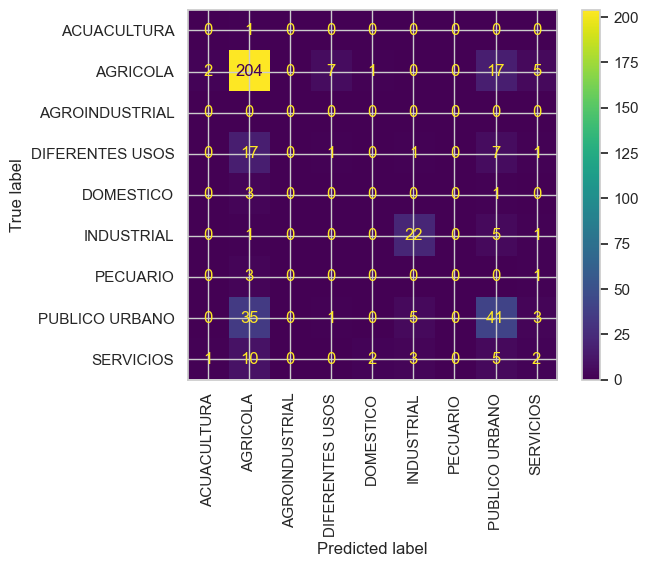

CPU times: total: 516 ms
Wall time: 495 ms


In [236]:
%time y_pred = prediction(knn, X_test, y_test)

In [237]:
precision_first =  0.6601466992665037

---

## 6. Análisis del desempeño del modelo.

In [238]:
print(f'El número de aciertos sobre el conjunto de entrenamiento es: {np.sum(y_test == y_pred)}')

El número de aciertos sobre el conjunto de entrenamiento es: 270


### Obtener el **volumen total** correspondiente a los **aciertos**

In [239]:
volumen_total = sum(pozos['Volumen (m3/año)'].values)
print(f'El volumen total de todos los títulos es: {volumen_total:,.2f} metros cúbicos.')

El volumen total de todos los títulos es: 212,405,314.47 metros cúbicos.


In [240]:
pozos.head()

,Latitud,Longitud,Municipio,RegiónHidrológica,Cuenca,AcuíferoHomologado,Volumen (m3/año),Uso
0,"71,916.00","-364,601.00",HUANDACAREO,LERMA-SANTIAGO,188,1602 - MORELIA-QUERENDARO,"22,800.00",AGRICOLA
1,"71,962.00","-364,590.00",HUANDACAREO,LERMA-SANTIAGO,188,1602 - MORELIA-QUERENDARO,"9,000.00",AGRICOLA
2,"72,142.00","-364,140.00",CUITZEO,LERMA-SANTIAGO,188,1602 - MORELIA-QUERENDARO,"20,020.00",AGRICOLA
3,"72,110.00","-364,178.00",CUITZEO,LERMA-SANTIAGO,188,1602 - MORELIA-QUERENDARO,"6,000.00",AGRICOLA
4,"71,351.00","-364,117.00",TARÍMBARO,LERMA-SANTIAGO,188,1602 - MORELIA-QUERENDARO,"30,000.00",SERVICIOS


In [241]:
def calc_vol_normalizado(data, y_test, y_pred, vol_total):
    indices = (y_test == y_pred).index.values  # índices enteros de las predicciones acertadas
    vol_normalizado = {}
    
    for i in indices:
        vol_normalizado[i] = (data[["Uso"]].iloc[i].to_numpy()[0],
                            100.0 * (data[["Volumen (m3/año)"]].iloc[i].to_numpy()[0]) / vol_total
                           )

    return pd.DataFrame.from_dict(data=vol_normalizado, orient='index',
                                  columns=['Uso', 'Volumen normalizado'])

In [242]:
volumen_normalizado = calc_vol_normalizado(pozos, y_test, y_pred, volumen_total)

In [243]:
volumen_normalizado.head(10)

,Uso,Volumen normalizado
63,AGRICOLA,0.47
1054,AGRICOLA,0.11
1008,PECUARIO,0.00
496,AGRICOLA,0.00
1192,AGRICOLA,0.01
825,INDUSTRIAL,0.15
905,AGRICOLA,0.11
564,AGRICOLA,0.00
31,AGRICOLA,0.01
420,AGRICOLA,0.06


In [244]:
aciertos_vol_norm_por_uso = volumen_normalizado.groupby('Uso').sum()
aciertos_vol_norm_por_uso

,Volumen normalizado
Uso,
ACUACULTURA,0.01
AGRICOLA,15.33
DIFERENTES USOS,1.08
DOMESTICO,0.08
INDUSTRIAL,7.43
PECUARIO,0.02
PUBLICO URBANO,6.12
SERVICIOS,0.97


In [245]:
aciertos_vol_norm_por_uso.sum()  # volumen total de los 'aciertos' (normalizado)

Volumen normalizado   31.04
dtype: float64

### El volumen correspondiente a los aciertos del modelo (considerando $5$ vecinos) es de: 31.21% 

---

## Obtener el volumen por uso

In [246]:
vol_por_uso_total = pozos.groupby('Uso').sum()
vol_por_uso_total = vol_por_uso_total['Volumen (m3/año)']
vol_por_uso_total

Uso
ACUACULTURA           45,000.00
AGRICOLA          91,725,771.79
AGROINDUSTRIAL        40,000.00
DIFERENTES USOS    5,866,832.32
DOMESTICO          1,354,190.77
INDUSTRIAL        60,461,754.00
PECUARIO             195,005.00
PUBLICO URBANO    47,014,568.69
SERVICIOS          5,702,191.90
Name: Volumen (m3/año), dtype: float64

In [247]:
aciertos_vol_norm_por_uso

,Volumen normalizado
Uso,
ACUACULTURA,0.01
AGRICOLA,15.33
DIFERENTES USOS,1.08
DOMESTICO,0.08
INDUSTRIAL,7.43
PECUARIO,0.02
PUBLICO URBANO,6.12
SERVICIOS,0.97


In [248]:
df = aciertos_vol_norm_por_uso.merge(vol_por_uso_total, how='inner', on='Uso')
df.columns = ['Volumen normalizado por uso (%)', 'Volumen TOTAL por uso (m3/año)']
df['Volumen por uso (m3/año)'] = df['Volumen normalizado por uso (%)'] * df['Volumen TOTAL por uso (m3/año)'] / 100.0

# Suppress scientific notation
pd.options.display.float_format = '{:,.2f}'.format
df

,Volumen normalizado por uso (%),Volumen TOTAL por uso (m3/año),Volumen por uso (m3/año)
Uso,,,
ACUACULTURA,0.01,"45,000.00",3.18
AGRICOLA,15.33,"91,725,771.79","14,058,521.26"
DIFERENTES USOS,1.08,"5,866,832.32","63,605.14"
DOMESTICO,0.08,"1,354,190.77","1,137.46"
INDUSTRIAL,7.43,"60,461,754.00","4,490,304.97"
PECUARIO,0.02,"195,005.00",44.70
PUBLICO URBANO,6.12,"47,014,568.69","2,877,663.90"
SERVICIOS,0.97,"5,702,191.90","55,305.11"


## 7. Encontrar el valor _óptimo_ de $k$

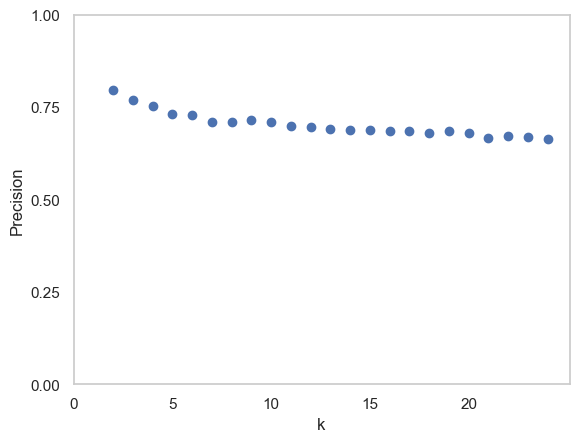

In [249]:
k_range = range(2, 25)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    pred1=knn.predict(X_train)
    scores.append(precision_score(y_train, pred1, average='micro'))
    
_ = plt.scatter(k_range, scores)
_ = plt.xlabel('k')
_ = plt.ylabel('Precision')
_ = plt.grid()
_ = plt.xticks([0,5,10,15,20])
_ = plt.yticks([0, 0.25, 0.5, 0.75, 1])

> A patir de $k = 15$, la precisión empieza a oscilar.

Precision =  0.6772616136919315
                 precision    recall  f1-score   support

    ACUACULTURA       0.00      0.00      0.00         1
       AGRICOLA       0.77      0.84      0.80       236
DIFERENTES USOS       0.00      0.00      0.00        27
      DOMESTICO       0.00      0.00      0.00         4
     INDUSTRIAL       0.67      0.83      0.74        29
       PECUARIO       0.00      0.00      0.00         4
 PUBLICO URBANO       0.53      0.59      0.56        85
      SERVICIOS       0.42      0.22      0.29        23

       accuracy                           0.68       409
      macro avg       0.30      0.31      0.30       409
   weighted avg       0.63      0.68      0.65       409



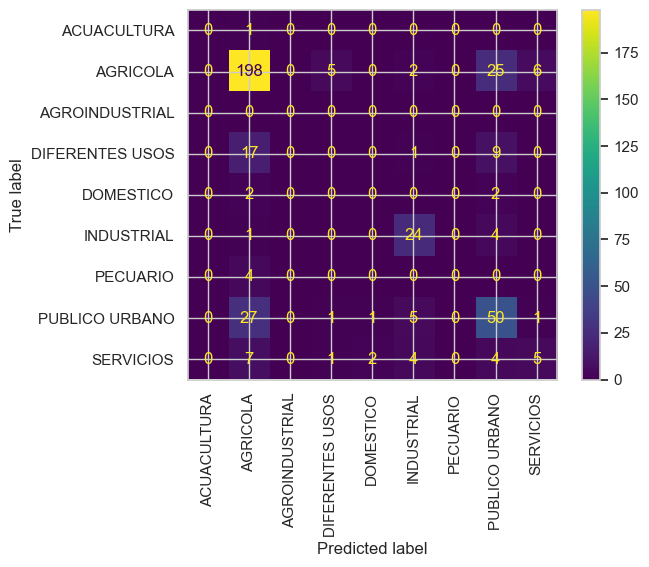

Precisión del modelo knn_k: 0.6772616136919315


In [250]:
# Entrenar el modelo knn_k
knn_k = KNeighborsClassifier(n_neighbors=15, weights='distance')
knn_k.fit(X_train, y_train)

# Realizar predicciones y calcular la precisión
y_pred_k = prediction(knn_k, X_test, y_test)
precision_knn_k = precision_score(y_test, y_pred_k, average='micro')

# Imprimir la precisión
print("Precisión del modelo knn_k:", precision_knn_k)

In [251]:
precision_segundo=  0.6772616136919315

In [252]:
print(f'El número de aciertos es: {np.sum(y_test == y_pred_k)}')

El número de aciertos es: 277


In [253]:
na_uno = 270
na_dos = 277

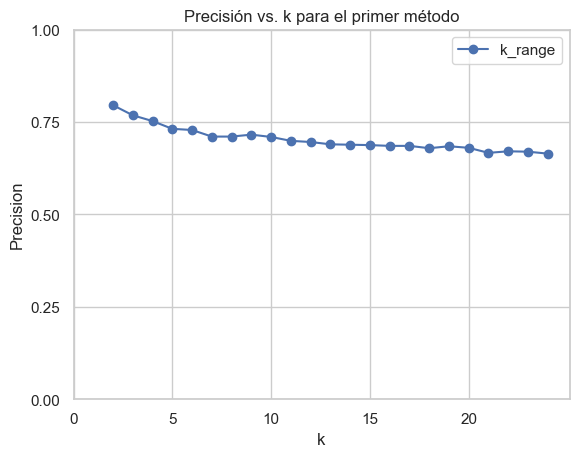

In [254]:
# Gráfica para el primer método (k_range)
_ = plt.plot(k_range, scores, marker='o', label='k_range')
_ = plt.xlabel('k')
_ = plt.ylabel('Precision')
_ = plt.title('Precisión vs. k para el primer método')
_ = plt.xticks([0, 5, 10, 15, 20])
_ = plt.yticks([0, 0.25, 0.5, 0.75, 1])
_ = plt.legend()

In [255]:
from sklearn.model_selection import GridSearchCV

# Definir los conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_cod, y, test_size=0.3, random_state=42)

# Definir el rango de valores de k que queremos probar
k_range = list(range(1, 31))

# Crear un diccionario de parámetros del modelo
param_grid = dict(n_neighbors=k_range)

# Instanciar el modelo k-NN
knn = KNeighborsClassifier()

# Instanciar GridSearchCV
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

# Ajustar GridSearchCV al conjunto de entrenamiento
grid.fit(X_train, y_train)

# Mostrar los resultados
print("Mejor valor de k:", grid.best_params_)
print("Mejor precisión encontrada:", grid.best_score_)


C:\Users\Karla\anaconda3\envs\ML\Lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


Mejor valor de k: {'n_neighbors': 6}
Mejor precisión encontrada: 0.6824342105263158


Precisión en el conjunto de prueba: 0.6625916870415648
El número de aciertos es: 271
Precision =  0.6625916870415648
                 precision    recall  f1-score   support

    ACUACULTURA       0.00      0.00      0.00         1
       AGRICOLA       0.71      0.92      0.81       220
 AGROINDUSTRIAL       0.00      0.00      0.00         1
DIFERENTES USOS       0.00      0.00      0.00        38
      DOMESTICO       0.00      0.00      0.00         3
     INDUSTRIAL       0.73      0.73      0.73        37
       PECUARIO       0.00      0.00      0.00         4
 PUBLICO URBANO       0.53      0.48      0.51        83
      SERVICIOS       0.10      0.05      0.06        22

       accuracy                           0.66       409
      macro avg       0.23      0.24      0.23       409
   weighted avg       0.56      0.66      0.61       409



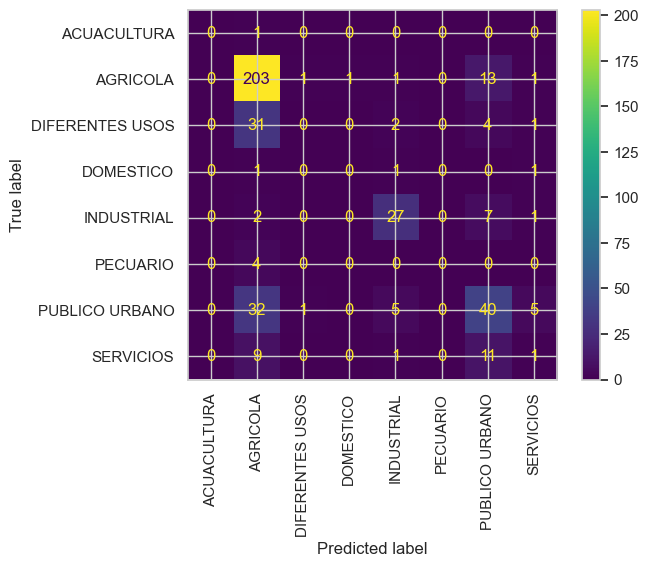

Tabla de predicciones:
428           AGRICOLA
930           AGRICOLA
781           AGRICOLA
451           AGRICOLA
429    DIFERENTES USOS
            ...       
485           AGRICOLA
462     PUBLICO URBANO
693           AGRICOLA
922           AGRICOLA
398     PUBLICO URBANO
Length: 409, dtype: object


In [256]:
# Definir el modelo KNN con el mejor valor de k encontrado por GridSearchCV
knn_best = KNeighborsClassifier(n_neighbors=6)

# Ajustar el modelo al conjunto de entrenamiento
knn_best.fit(X_train, y_train)

# Predecir las etiquetas en el conjunto de prueba
y_pred_best = knn_best.predict(X_test)

# Calcular la precisión en el conjunto de prueba
precision_best = accuracy_score(y_test, y_pred_best)
print("Precisión en el conjunto de prueba:", precision_best)

# Imprimir el número de aciertos
print(f'El número de aciertos es: {np.sum(y_test == y_pred_best)}')

# Imprimir la tabla de predicciones
y_pred_table_best = prediction(knn_best, X_test, y_test)
print("Tabla de predicciones:")
print(y_pred_table_best)


In [257]:
precision_tres = 0.6625916870415648 
na_tres =  271

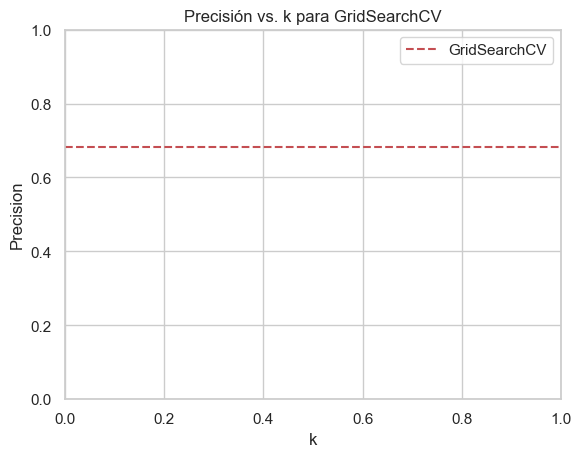

In [258]:

# Gráfica para el segundo método (GridSearchCV)
_ = plt.axhline(grid.best_score_, color='r', linestyle='--', label='GridSearchCV')
_ = plt.xlabel('k')
_ = plt.ylabel('Precision')
_ = plt.title('Precisión vs. k para GridSearchCV')
_ = plt.legend()


In [259]:
import pandas as pd

# Crear un diccionario con los datos
data = {
    'Modelo': ['Primer Modelo', 'Segundo Modelo', 'Tercer Modelo'],
    'Precisión': [precision_first, precision_segundo, precision_tres],
    'Número de Aciertos': [na_uno, na_dos, na_tres]
}

# Crear un DataFrame a partir del diccionario
df = pd.DataFrame(data)

# Mostrar el DataFrame
print(df)

           Modelo  Precisión  Número de Aciertos
0   Primer Modelo       0.66                 270
1  Segundo Modelo       0.68                 277
2   Tercer Modelo       0.66                 271


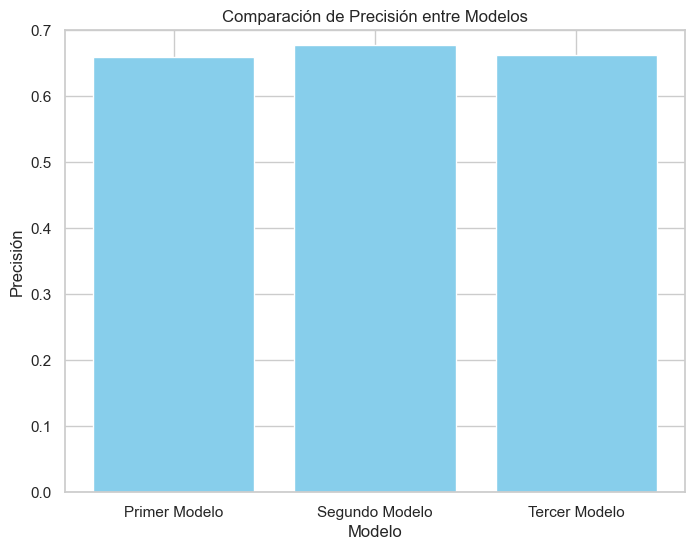

In [265]:
import matplotlib.pyplot as plt

# Definir los nombres de los modelos
modelos = ['Primer Modelo', 'Segundo Modelo', 'Tercer Modelo']

# Definir los valores de precisión
precisiones = [precision_first, precision_segundo, precision_tres]

# Crear la gráfica de barras
plt.figure(figsize=(8, 6))
plt.bar(modelos, precisiones, color='skyblue')

# Añadir etiquetas y título
plt.xlabel('Modelo')
plt.ylabel('Precisión')
plt.title('Comparación de Precisión entre Modelos')
plt.ylim(0,0.70 )  # Establecer el rango del eje y

# Mostrar la gráfica
plt.show()



## <span style="color:DarkciónBlue"> 4. Conclusiones</span>

### Análisis de Resultados:
Basándonos en los resultados presentados en la tabla:

Primer Modelo:

Precisión: 0.66
Número de Aciertos: 270

Segundo Modelo:

Precisión: 0.68
Número de Aciertos: 277

Tercer Modelo:

Precisión: 0.66
Número de Aciertos: 271

Podemos hacer las siguientes conclusiones:

El segundo modelo tiene la mayor precisión con un valor de 0.68 y también tiene el mayor número de aciertos, con un total de 277. Aunque el tercer modelo tiene una precisión similar de 0.66, tuvo menos aciertos en comparación con el segundo modelo, con un total de 271. El primer modelo tiene una precisión ligeramente menor de 0.66 y el menor número de aciertos, con un total de 270. En este caso podemos concluir que el mejor modelo es el segundo donde el numero de vecinos es de 15 vecinos aunque tambien pueden haber varios factores que los influyan como lo son el rango del gridsearch


## <span style="color:DarkciónBlue"> 5. Referencias</span>
### Documentos consultados 
[1] "GridSearchCV." scikit-learn. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html (accessed Apr. 07, 2024).

